### PCA - Principle Component Analysis

##### PCA technique is particularly useful in processing data where multi-colinearity exists between the features/variables.

##### PCA can help us improve performance at a very low cost of model accuracy. Other benefits of PCA include reduction of noise in the data, feature selection (to a certain extent), and the ability to produce independent, uncorrelated features of the data.

In [1]:
#imported all the useful
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loaded a dataset from sklearn 
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [3]:
cancer.keys() #keys of the data

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names']) #data is present in key-Data. so defined data as dataframe  
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.preprocessing import StandardScaler #import standard scaler form preprocessing
scaler=StandardScaler()

In [6]:
scaler.fit(df) #fit the scaler on data

StandardScaler()

In [7]:
scaled_data=scaler.transform(df) #transform the scaler on data

In [8]:
df2=pd.DataFrame(scaled_data,columns=cancer['feature_names'])
df2.head() 
#defined the dataframe with scaled data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [19]:
from sklearn.decomposition import PCA #import PCA from decomposition
pca=PCA(0.95) #defined 0.95 which means the principle components should explain 95% variance of the data.

In [20]:
pca.fit(df2) #fit the model

PCA(n_components=0.95)

In [21]:
p=pca.transform(df2) #transform on the df2

In [30]:
pca.explained_variance_
#eigen value

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888,  0.47745625,  0.41762878,  0.35131087])

In [39]:
pca.components_.shape
#eigen vectors

(10, 30)

In [41]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

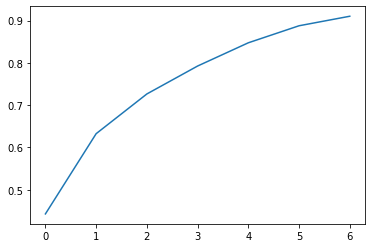

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [22]:
df3=pd.DataFrame(p) #data after the PCA
df3.head()
#we can observe here the variables are reduced to only 4 from 30 after PCA.

,0,1,2,3,4,5,6,7,8,9
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704


In [23]:
#define dependent & independenet variables
x=df3.iloc[:,:]
y=pd.DataFrame(cancer['target'])

In [24]:
#apply cross validation methods
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)

In [25]:
#evaluation of cross validation score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [26]:
result=cross_val_score(dt,x,y,cv=kf)

In [27]:
print(result)
print(result.mean())

[0.90350877 0.88596491 0.95614035 0.98245614 0.9380531 ]
0.9332246545567457


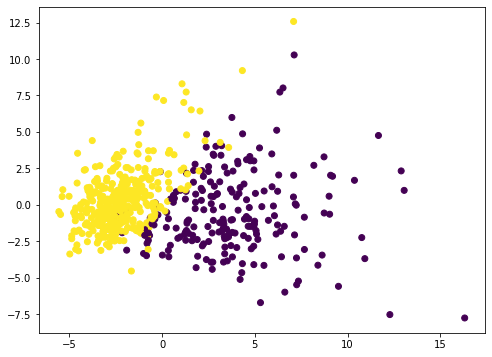

In [28]:
plt.figure(figsize =(8, 6))
plt.scatter(p[:, 0], p[:, 1], c = cancer['target'])